# Setup
For this project we need the torch, transformers and sentencepiece Python packages in order to load and use pre-trained models. We will also need the huggingface_hub package to programmatically login to the Hugging Face Hub and manage repositories, and the datasets package to download datasets from the Hub.

The sentencepiece package is required by transformers to perform inference with some of the pre-trained open source models on Hugging Face Hub and does not need to be explicitly imported. Import the remaining packages as follows.

Run the provided !pip code to install necessary packages and restart your kernel.
Import torch
Import huggingface_hub using the alias hf_hub.
Import datasets
Import transformers

In [10]:
# %pip install -U datasets
# %pip install huggingface_hub
# %pip install pyarrow
# %pip install transformers
# %pip install hf_xet

In [11]:
import os # Import os

# Suppress HuggingFace symlink warning on Windows
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

import torch # Import torch
import huggingface_hub as hf_hub # Import huggingface_hub using the alias hf_hub
import datasets # Import datasets 
import transformers # Import transformers

# Downloading pre-trained models
- Hugging Face Hub is a Git-based platform hosting model and dataset repos (each with a README and examples, e.g., bert-base-cased).
- Use transformers or diffusers to load and run pretrained models.
- Auto classes unify loading across architectures:
    - AutoModel, AutoModelFor<TASK>, AutoTokenizer, AutoFeatureExtractor, AutoImageProcessor, AutoProcessor.
- from_pretrained(<repo_or_path>) downloads configs, weights, and preprocessors.
- In this task, load the “cardiffnlp/twitter-roberta-base-emoji” tokenizer and model—a tweet emoji classifier. from_pretrained() fetches the necessary tokenizer files from that repo.


In [12]:
# Import the AutoTokenizer and AutoModel classes from transformers
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained tokenizer of the "cardiffnlp/twitter-roberta-base-emoji" model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

What from_pretrained() does

The from_pretrained() method first searches for a model repository with the same name on the Hugging Face Hub but it also accepts a local path or a URL with the expected folder structure. You can simply git clone the repository and load it from your local path.

In [13]:
# Print the tokenizer to see the data preprocessing configuration for this model 
print(tokenizer)

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-emoji', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}


Tokenizers

NLP models can't process text inputs as it is and need to be converted to a fixed length mathematical format. The Tokenizer classes preprocess the text such that each word and punctuation is given a unique ID or a token, short sentences are padded and long sentences are truncated to create fixed-size input vectors. They also allow using additional tokens such as bos, eos, unk, sep, and more to specify start and end of sentences, and to assign token IDS to unknown words that are not in the tokenizer vocabulary.

The output of the tokenizer tells us this pretrained model uses a tokenizer with a 50265 unique token IDs that applies padding or truncation to the end of each input text, and removes leading (leftside) extra whitespaces. The tokenizer also returns attention masks that tell the model which tokens are actual input tokens and which ones are just padding.

In [14]:
# Load the pre-trained model of the "cardiffnlp/twitter-roberta-base-emoji" model
model = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emoji and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Notes on Model Loading

Take a look at the warning above. We were only able to load a chunk of the model parameters included in the checkpoint with the AutoModel class.

This is because all transformers models are designed to have a single base class and multiple task-specific prediction classes built on top of it. The AutoModel class is designed to only load the base model parameters such as RobertaModel but not task-specific models such as RobertaForSequenceClassification.

In order to identify the exact class name and task of your target checkpoint, you can simply refer to the model configuration.

In [15]:
# Get the model configuration 
config = model.config

# Print model config's architectures attribute to see the model class name
print(model.config.architectures)

['RobertaForSequenceClassification']


We found out that the pretrained model we are trying to load is an instance of the RobertaForSequenceClassification class.

Important Tip

You don't have to download and print out the configuration to identify the model class name. You can simply navigate to the 
config.json
 file within the model repository to find it out.

# Task 2: Downstream Tasks and Task-Specific AutoModel Classes
* Limitations of AutoModel

In the previous task, we learned all about Auto classes and the limitations of the AutoModel class. We also learned that each transformers model consists of a base class and one or more task-specific classes. For example, RoBERTa has the base RobertaModel class and multiple prediction classes such as RobertaForSequenceClassification, RobertaForQuestionAnswering, etc. that leverage the base class.

Task-Specific AutoModel Classes

Luckily for us, transformers has multiple task-specific AutoModelForTASK classes to load pretrained models. 
In this task, you will learn how to load a pretrained model with a task-specific Auto model class.

* Instructions
Load the 
cardiffnlp/twitter-roberta-base-emoji
 model we used in the previous task with the correct AutoModelForTASK class.

cardiffnlp/twitter-roberta-base-emoji is an instance of the RobertaForSequenceClassification class, take a look at the list of 
Auto Classes
Identify and import the correct Auto class
Load the pretrained model

In [16]:
# Load the correct AutoModel class for RobertaForSequenceClassification
from transformers import AutoModelForSequenceClassification

# Load the pretrained "cardiffnlp/twitter-roberta-base-emoji" model using the correct auto model class
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

# Task 3: Explicit Model and Preprocesser Class Names
We learned how to identify the data preprocessor and model class of a model repository on the Hub in the previous task. Note that you can also do this by navigating to the Files and versions tab on the repository page.

Similar to models with multiple task-specific model classes, data preprocessor classes are named based on the model name and the modality.

Tokenizer classes for language models
FeatureExtractor classes for audio models
ImageProcessor classes for computer vision models
Processor classes for multi-modal models
These data preprocessor classes transform raw input data such as text, image, etc. to the format expected by your target pre-trained model. For an vision model, the preprocessor performs steps such as resizing to a fixed size, normalization, cropping, etc. In this task, you will

Use the "cardiffnlp/twitter-roberta-base-emoji" model we loaded with Auto classes before Explicitly import a model and its preprocessor class
Use explicit class names to load a pretrained model and its preprocessor

Instructions
Start by explicitly importing the tokenizer and model class of "cardiffnlp/twitter-roberta-base-emoji", which we identified in our previous task.

Use the from_pretrained method to download and load the tokenizer and model

In [17]:
# Import the explicit tokenizer class of "cardiffnlp/twitter-roberta-base-emoji" and the explicit model class of "cardiffnlp/twitter-roberta-base-emoji"
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

# Load the tokenizer and model using the from_pretrained method
tokenizer = RobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

# Task 4: Creating an NLP Pipeline - Part 1/2
You learned how to navigate the Hugging Face Hub repositories, identify the model and data preprocessor classes of your target repository and how to import and load a pre-trained model and its corresponding preprocessor.

You will now put these skills to use and create powerful language translation pipeline with a few lines of code using the 
google/flan-t5-base
 model. This multi-lingual translation model allows you to translate between multiple languages. For a full list of languages this model supports, simply refer to its model repository.

Text-to-Text Generation

In transformers, NLP models with text input and output fall under the AutoModelForSeq2SeqLM class. This class of pretrained models perform tasks such as translation, question answering and text completion.

Inputs for T5

The tokenizer of T5 preprocesses the raw text input to return its token ids and attention mask. Each token id represents a unique word, tag or punctuation in the model's vocabulary. The attention mask consists of 1s and 0s for each token to decide whether that token should be attended to or ignored by the transformer model.

In this task, you will learn

What the tokenizer classes do under the hood
How to preprocess your raw input text

* Instructions

Use the AutoTokenizer and AutoModelForSeq2SeqLM classes to load the pre-trained "google/flan-t5-base" model and its tokenizer
Create a text input that includes
A prompt to specify source and target languages for translation
Text to be translated
Preprocess the text input to retrieve token ids and the attention mask

In [18]:
# Import AutoModelForSeq2SeqLM from transformers and Load the pre-trained google/flan-t5-base model and tokenizer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

We are ready to perform inference with the pretrained model. We will start by defining an input sentence where we start by which language we would like to translate from and to, and add the sentence to be translated.

In [19]:
# Specify source and target languages for translation
source_lang = "English"
target_lang = "German"
input_text = f"translate {source_lang} to {target_lang}: How old are you?"

# Use the tokenizer to preprocess input text, with return_tensors="pt" to return PyTorch tensors 
inputs = tokenizer(input_text, return_tensors="pt") # "pt"=pytorch

# Print the key and values of the preprocessed inputs dictionary
for key, value in inputs.items():
    print(key, value)

input_ids tensor([[13959,  1566,    12,  2968,    10,   571,   625,    33,    25,    58,
             1]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


# Task 5: Creating an NLP Pipeline - Part 2/2
You preprocessed the input text and are ready learn how to perform inference. In this task, you will learn

How to use torch.no_grad() to perform inference fast and efficiently, and reduce memory usage
How to feed preprocessed inputs to the model
How to decode model output to make it human readable
Note that transformers and diffusers libraries support batched inputs, meaning you can inputs multiple text inputs or images, etc. as a list. Regardless of the number of inputs, the preprocess and model classes output batched results where each entry corresponds to an input.

Instructions
Using torch.no_grad()

Pass preprocessed inputs to the loaded model to perform inference
Save the model output to a variable named outputs
Decode the model output tokens to human readable format

In [20]:
# Use torch.no_grad() to prevent gradient accumulation - speeds up inference, reduces memory
with torch.no_grad():
    # Use model.generate method to perform inference
    # Use **inputs to pass the unpacked dictionary as multiple arguments to the generate method
    outputs = model.generate(**inputs)

# The output is a list of length batch_size - number of input texts - which is 1 in this case
# Print the length of outputs list
print(len(outputs))

c:\Users\Tiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


1


The model output is a sequence of token IDs, where each token represents a unique word or punctuation in the vocabular. To decode it to a human readable format, we just need to map each token ID to its corresponding word. All Tokenizer classes of transformers provides a convenient decode method to do this.

In [21]:
# Use the decode method of the tokenizer to convert the output to a human readable format 
# print(tokenizer.decode(outputs[0]))
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
translated_text

'Wie old sind Sie?'

# Task 6: Datasets Library
The transformers library is designed to make it easy to load and use pre-trained models, and to preprocess raw input data. However, it is up to you to find or create interesting datasets.

We will now take a look at the datasets library and learn how to find, download and create datasets with a few lines of code. This library is part of the Hugging Face ecosystem, and similar to transformers and diffusers, is tightly integrated with the Hugging Face Hub. Each library is stored as a Git repository on the Hub and can be downloaded with a single line of code.

In this task, you will learn

How to use the load_dataset() function to download and load a dataset from the Hub
How to only download a specific data split (training, validation, test)
Instructions
Import the load_dataset() function from datasets
Load the "adirik/fashion_image_caption-100" dataset
Print the dataset to see what features it contains
Print a sample of the dataset
Download only the training split of the dataset

In [22]:
# Import load_dataset from datasets package
from datasets import load_dataset

# Use the load_dataset function to load the "adirik/fashion_image_caption-100" dataset
dataset = load_dataset("adirik/fashion_image_caption-100")

# Print the dataset object
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 100
    })
})


Each dataset is a dictionary with train, and optionally val and test splits. Each split contains an iterable subset of the data with one or more keys that represent the features of the dataset defined by the dataset owner. For example, the "adirik/fashion_image_caption-100" dataset contains image and text keys.

In [23]:
# Print the fifth data sample in the dataset - an image and a text caption pair
print(dataset['train'][4])

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=384x384 at 0x271A9C40FB0>, 'text': 'A dress with Color: Black, Department: Dresses, Detail: Button Front, Fabric-Elasticity: No Sretch, Fit: Fitted, Hemline: Slit, Material: Tweed, Neckline: Collared, Pattern: Plaid, Sleeve-Length: Sleeveless, Style: Elegant, Type: Button Up Shirt, Waistline: Regular'}


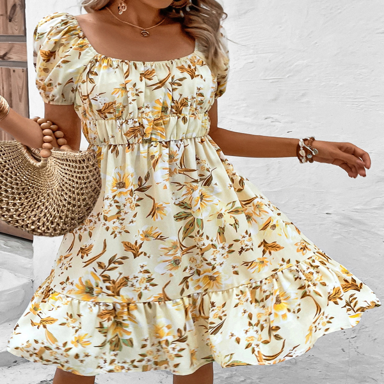

In [24]:
# Visualize the image of the first data sample
dataset['train'][5]['image'] #.show()

You can also opt to download only a specific split of the dataset or pass in the streaming=True argument in order to download smaller subsets.

In [25]:
# Download only the training split of the dataset
dataset = load_dataset("adirik/fashion_image_caption-100", split="train")

# Task 7: CV / Multi-Modal Pipeline - Part 1/2
We learned to how download datasets easily with the datasets library and tricks such as streaming to download data samples one by one if we don't have sufficient disk space for the whole dataset.

As demonstrated in the previous task, the image captions of the "adirik/fashion_image_caption-100" dataset are not very high quality. Could we create a better version of this dataset? Let's first setup an image captioning pipeline to see if we can generate better captions.

In this task, you will learn

How to create an multi-modal / image captioning pipeline with 
BLIP
How to use datasets library datasets as input to transformers models
How to postprocess / decode BLIP output to retrieve human-readable captions
Instructions
Take a look at the Salesforce/blip-image-captioning-base repository on the Hugging Face Hub and determine the model and preprocessor classes.

Import the correct preprocessor and model classes from transformers
Using the from_pretrained() method
Create a preprocessor
Download and load the pre-trained model
Perform inference with a single image sample
Decode model output

In [26]:
# Import BlipProcessor and BlipForConditionalGeneration from transformers
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load preprocessor of "Salesforce/blip-image-captioning-base"
preprocessor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load pre-trained "Salesforce/blip-image-captioning-base" model
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Data preprocessor classes of Python are designed for ease of use. You can simply pass in a single or a list of Pillow image/s, url/s or local path/s to your image as the main argument to ImageProcessor class instances.

In [31]:
# Preprocess the first image of the dataset, return result as pytorch tensors
inputs = preprocessor(images=dataset[0]["image"], return_tensors="pt")
for key, value in inputs.items():
    print(key, value.shape)

pixel_values torch.Size([1, 3, 384, 384])


The inference is almost the same as the NLP task as BLIP is a conditional text generation model. We will need to call model.generate() to run the model and use the decode method of the preprocessor to convert the output caption to a human readable format.

In [32]:
# Use torch.no_grad() to prevent gradient accumulation - speeds up inference, reduces memory
with torch.no_grad():
    # Predict caption using the generate method of the model
    output = model.generate(**inputs)

# Decode model output to text using processor (not preprocessor)
caption = preprocessor.decode(output[0], skip_special_tokens=True)

# Print decoded caption
print(caption)

c:\Users\Tiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a woman wearing a yellow sequin dress


# Task 8: CV / Multi-Modal Pipeline - Part [2/2]
Seems like we were able to come up with a more intuitive yet less detailed image caption, but that is good enough for us. For this final task, you will learn

How to create a mapping function to preprocess and generate new captions for all samples in the datasets
Warning
This step is computationally intensive and takes several minutes to run in Workspace Premium. It does not consistently run in the free version of Workspace.

Instructions
You will create a replace_caption() function that takes a dictionary {"image": ..., "text": ...} as input.

Create replace_caption() function with a single argument named data
Place the preprocessing and inference steps of the previous task within this function and use the "image" value as input
Set the decoded output as the new value of the "text" key
Return the updated data dictionary
Use 
Dataset.map()
 method to apply the function to whole dataset
Use 
Dataset.push_to_hub()
 method to push the updated dataset to the hub

In [ ]:
# Create a replace_caption function that takes a data dictionary as input
def replace_caption(data):
    # Preprocess the image value of the data dictionary
    inputs = preprocessor(images=data["image"], return_tensors="pt")
    
    # Predict the caption with torch.no_grad and the generate method
    with torch.no_grad():
        output = model.generate(**inputs)
    
    # Decode model output to text
    caption = preprocessor.decode(output[0], skip_special_tokens=True)
    
    # Set caption as the new text value of the data dictionary
    data["text"] = caption    
    return data

# Use the map function to replace the captions of whole dataset
dataset = dataset.map(replace_caption)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]c:\Users\Tiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
c:\Users\Tiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Map: 100%|██████████| 100/100 [03:27<00:00,  2.07s/ examples]


# Task 9: Pushing Datasets (and Models) to the Hub
The 
Hugging Face Hub
 is a Git platform specialized for machine learning. You can search for pre-trained model and dataset repositories on the website, clone or create and update repositories public or private repositories.

Alternatively, you can use the huggingface_hub Python package to programmatically:

Login to the Hub.
Search for open-source models on the Hub based on task type, model name, description, etc.
Download specific or all files from a repository.
Manage your repositories.
When in doubt, refer to the corresponding Hugging Face 
documentation
 to get started.

Instructions
Use the huggingface_hub library to programatically interact with the Hugging Face Hub.

Login to your Hugging Face account using your HUGGINGFACE_TOKEN.
Push the updated dataset to the Hub

In [ ]:
# Assign your HUGGINGFACE_TOKEN to a variable named hf_token
hf_token = "HUGGING_FACE_TOKEN"  # Replace with your actual token

# Login to the HF Hub using your hf_token
hf_hub.login(token=hf_token)

HTTPError: Invalid user token.

In [ ]:
# Push the new / improved dataset to the hub with the push_to_hub method
hf_username = "your-username"  # Replace with your Hugging Face username
dataset.push_to_hub(f"{hf_username}/fashion_image_caption-100-improved")